## Import Libraries

In [82]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

## Load Data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')
%cd "/content/gdrive/MyDrive/AI Data"

Mounted at /content/gdrive/
/content/gdrive/MyDrive/AI Data


In [39]:
data = pd.read_csv("roo_data.csv")
data.head(2)

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator


In [4]:
data.columns

Index(['Acedamic percentage in Operating Systems', 'percentage in Algorithms',
       'Percentage in Programming Concepts',
       'Percentage in Software Engineering', 'Percentage in Computer Networks',
       'Percentage in Electronics Subjects',
       'Percentage in Computer Architecture', 'Percentage in Mathematics',
       'Percentage in Communication skills', 'Hours working per day',
       'Logical quotient rating', 'hackathons', 'coding skills rating',
       'public speaking points', 'can work long time before system?',
       'self-learning capability?', 'Extra-courses did', 'certifications',
       'workshops', 'talenttests taken?', 'olympiads',
       'reading and writing skills', 'memory capability score',
       'Interested subjects', 'interested career area ', 'Job/Higher Studies?',
       'Type of company want to settle in?',
       'Taken inputs from seniors or elders', 'interested in games',
       'Interested Type of Books', 'Salary Range Expected',
       'In a Rea

In [6]:
category_cols = []

for col in data.columns:
    if data[col].dtype == 'object':
        category_cols.append(col)

## Process Data

In [40]:
conversion_map = {
    'Introvert': {'yes': 1, 'no': 0}, 'worked in teams ever?': {'yes': 1, 'no': 0},
    'hard/smart worker': {'hard worker': 1, 'smart worker': 0},
    'Salary/work': {'salary': 1, 'work':0},
    'Management or Technical': {'Management': 1, 'Technical': 0},
    'Gentle or Tuff behaviour?': {'gentle': 1, 'stubborn': 0},
    'Salary Range Expected': {'salary': 1, 'Work': 0},
    'interested in games': {'yes': 1, 'no':0}, 'In a Realtionship?': {'yes': 1, 'no':0},
    'Taken inputs from seniors or elders': {'yes': 1, 'no': 0},
    'Job/Higher Studies?': {'job': 1, 'higherstudies': 0},
    'memory capability score': {'excellent': 1, 'medium': 0,'poor': -1},
    'reading and writing skills': {'excellent': 1, 'medium': 0,'poor': -1},
    'olympiads': {'yes':1, 'no': 0},'self-learning capability?': {'yes': 1, 'no': 0},
    'talenttests taken?': {'yes': 1, 'no': 0},'Extra-courses did': {'yes': 1, 'no': 0},
    'can work long time before system?':{'yes': 1, 'no': 0}               
}

data.replace(conversion_map,inplace=True)   
data.shape  

(20000, 39)

In [41]:
courses_cols = ["Acedamic percentage in Operating Systems",
"percentage in Algorithms",
"Percentage in Programming Concepts",
"Percentage in Software Engineering",
"Percentage in Computer Networks",
"Percentage in Electronics Subjects",
"Percentage in Computer Architecture",
"Percentage in Mathematics",
"Percentage in Communication skills"]

# convertion grades into three possible values
# 0 -> bad, 1 -> avg, 2 -> good
for col in courses_cols:
    data[col] = data[col] // 34

data.head(2)

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,2,1,2,2,2,2,2,2,1,9,...,Prayer books,1,0,0,1,1,1,1,0,Database Developer
1,2,1,2,1,2,2,2,2,2,12,...,Childrens,1,1,1,0,1,1,0,1,Portal Administrator


In [42]:
X = data.drop('Suggested Job Role', axis=1)
encoded_X = pd.get_dummies(X, prefix_sep='_', drop_first = True)
y = data['Suggested Job Role']

encoded_X.shape,y.shape

((20000, 100), (20000,))

In [14]:
y.unique()

array(['Database Developer', 'Portal Administrator',
       'Systems Security Administrator', 'Business Systems Analyst',
       'Software Systems Engineer', 'Business Intelligence Analyst',
       'CRM Technical Developer', 'Mobile Applications Developer',
       'UX Designer', 'Quality Assurance Associate', 'Web Developer',
       'Information Security Analyst', 'CRM Business Analyst',
       'Technical Support', 'Project Manager',
       'Information Technology Manager', 'Programmer Analyst',
       'Design & UX', 'Solutions Architect', 'Systems Analyst',
       'Network Security Administrator', 'Data Architect',
       'Software Developer', 'E-Commerce Analyst',
       'Technical Services/Help Desk/Tech Support',
       'Information Technology Auditor', 'Database Manager',
       'Applications Developer', 'Database Administrator',
       'Network Engineer', 'Software Engineer', 'Technical Engineer',
       'Network Security Engineer',
       'Software Quality Assurance (QA) / Testi

## Reducing Classification classes

In [15]:
y_map = {
    'Database Developer': 'Database',
    'Portal Administrator': 'Administrator',
    'Systems Security Administrator': 'Administrator',
    'Business Systems Analyst': 'Analyst',
    'Software Systems Engineer': 'Engineer',
    'Business Intelligence Analyst': 'Analyst',
    'CRM Technical Developer': 'Developer',
    'Mobile Applications Developer': 'Developer',
    'UX Designer': 'Designer',
    'Quality Assurance Associate': 'QA',
    'Web Developer': 'Developer',
    'Information Security Analyst': 'Analyst',
    'CRM Business Analyst': 'Analyst',
    'Technical Support': 'Support',
    'Project Manager': 'Manager',
    'Information Technology Manager': 'Manager',
    'Programmer Analyst': 'Analyst',
    'Design & UX': 'Designer',
    'Solutions Architect': 'Engineer',
    'Systems Analyst': 'Analyst',
    'Network Security Administrator': 'Administrator',
    'Data Architect': 'Database',
    'Software Developer': 'Developer',
    'E-Commerce Analyst': 'Analyst',
    'Technical Services/Help Desk/Tech Support': 'Support',
    'Information Technology Auditor': 'Auditor',
    'Database Manager': 'Database',
    'Applications Developer': 'Developer',
    'Database Administrator': 'Database',
    'Network Engineer': 'Engineer',
    'Software Engineer': 'Egineer',
    'Technical Engineer': 'Engineer',
    'Network Security Engineer': 'Engineer',
    'Software Quality Assurance (QA) / Testing': 'QA'
}

In [43]:
y_new = list(y)
for i in range(len(y_new)):
  y_new[i] = y_map[y[i]]
y_new = pd.core.series.Series(y_new)
y_new

0             Database
1        Administrator
2        Administrator
3        Administrator
4              Analyst
             ...      
19995         Engineer
19996          Analyst
19997          Analyst
19998               QA
19999        Developer
Length: 20000, dtype: object

In [92]:
y_new.unique()

array(['Database', 'Administrator', 'Analyst', 'Engineer', 'Developer',
       'Designer', 'QA', 'Support', 'Manager', 'Auditor', 'Egineer'],
      dtype=object)

In [44]:
D = encoded_X.copy()
D['y'] = y_new
D.head(2)

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books_Religion-Spirituality,Interested Type of Books_Romance,Interested Type of Books_Satire,Interested Type of Books_Science,Interested Type of Books_Science fiction,Interested Type of Books_Self help,Interested Type of Books_Series,Interested Type of Books_Travel,Interested Type of Books_Trilogy,y
0,2,1,2,2,2,2,2,2,1,9,...,0,0,0,0,0,0,0,0,0,Database
1,2,1,2,1,2,2,2,2,2,12,...,0,0,0,0,0,0,0,0,0,Administrator


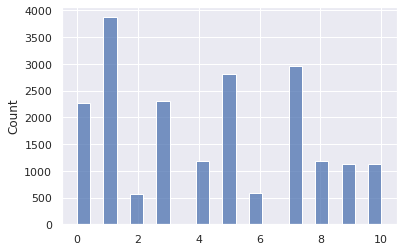

In [45]:
le = LabelEncoder()
y = le.fit_transform(y_new)
sns.set(font_scale=1)
sns.histplot(y)

In [46]:
X = encoded_X

encoded_X.iloc[0]
y = le.fit_transform(y_new)

In [48]:
std = StandardScaler()
scaled = std.fit_transform(X,y)

## Training the Models

In [87]:
clf = MLPClassifier(
    hidden_layer_sizes=(50, 50), activation='identity',
    max_iter = 300, learning_rate_init = 0.01, random_state = 0,
    verbose = True)

### 60 - 40 split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(scaled, y, train_size = 0.6, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12000, 100), (8000, 100), (12000,), (8000,))

In [54]:
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

Iteration 1, loss = 2.38322174
Iteration 2, loss = 2.27266119
Iteration 3, loss = 2.25823822
Iteration 4, loss = 2.24798480
Iteration 5, loss = 2.24347180
Iteration 6, loss = 2.24310190
Iteration 7, loss = 2.24065522
Iteration 8, loss = 2.23857430
Iteration 9, loss = 2.23669969
Iteration 10, loss = 2.23578432
Iteration 11, loss = 2.23684171
Iteration 12, loss = 2.23588096
Iteration 13, loss = 2.23561521
Iteration 14, loss = 2.23487118
Iteration 15, loss = 2.23489406
Iteration 16, loss = 2.23567183
Iteration 17, loss = 2.23282395
Iteration 18, loss = 2.23405608
Iteration 19, loss = 2.23317754
Iteration 20, loss = 2.23269890
Iteration 21, loss = 2.23375363
Iteration 22, loss = 2.23415415
Iteration 23, loss = 2.23393833
Iteration 24, loss = 2.23357372
Iteration 25, loss = 2.23523593
Iteration 26, loss = 2.23478132
Iteration 27, loss = 2.23336150
Iteration 28, loss = 2.23303525
Iteration 29, loss = 2.23397244
Iteration 30, loss = 2.23549996
Iteration 31, loss = 2.23439720
Training loss did

### 80 - 20 split

In [88]:
X_train,X_test,y_train,y_test = train_test_split(scaled, y, train_size = 0.80, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 100), (4000, 100), (16000,), (4000,))

In [89]:
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

Iteration 1, loss = 2.35640042
Iteration 2, loss = 2.26292234
Iteration 3, loss = 2.25067044
Iteration 4, loss = 2.24507398
Iteration 5, loss = 2.23989087
Iteration 6, loss = 2.24244957
Iteration 7, loss = 2.24055353
Iteration 8, loss = 2.23830416
Iteration 9, loss = 2.23650705
Iteration 10, loss = 2.23754323
Iteration 11, loss = 2.23563941
Iteration 12, loss = 2.23533246
Iteration 13, loss = 2.23563060
Iteration 14, loss = 2.23502256
Iteration 15, loss = 2.23627779
Iteration 16, loss = 2.23723316
Iteration 17, loss = 2.23584582
Iteration 18, loss = 2.23732467
Iteration 19, loss = 2.23631338
Iteration 20, loss = 2.23750414
Iteration 21, loss = 2.23602774
Iteration 22, loss = 2.23675684
Iteration 23, loss = 2.23691750
Iteration 24, loss = 2.23629201
Iteration 25, loss = 2.24006525
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.191


### 90 - 10 split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(scaled, y, train_size = 0.90, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18000, 100), (2000, 100), (18000,), (2000,))

In [62]:
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

Iteration 1, loss = 2.34410629
Iteration 2, loss = 2.26027107
Iteration 3, loss = 2.25124445
Iteration 4, loss = 2.24376846
Iteration 5, loss = 2.24100699
Iteration 6, loss = 2.24223637
Iteration 7, loss = 2.23858995
Iteration 8, loss = 2.23813897
Iteration 9, loss = 2.23753659
Iteration 10, loss = 2.23693580
Iteration 11, loss = 2.23614874
Iteration 12, loss = 2.23567985
Iteration 13, loss = 2.23437459
Iteration 14, loss = 2.23609331
Iteration 15, loss = 2.23616536
Iteration 16, loss = 2.23686777
Iteration 17, loss = 2.23557343
Iteration 18, loss = 2.23654128
Iteration 19, loss = 2.23776301
Iteration 20, loss = 2.23759528
Iteration 21, loss = 2.23774172
Iteration 22, loss = 2.23927541
Iteration 23, loss = 2.23890243
Iteration 24, loss = 2.23914842
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.1915


## Classification report

In [90]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.08      0.00      0.01       477
           1       0.20      0.85      0.32       772
           2       0.00      0.00      0.00       112
           3       0.00      0.00      0.00       463
           4       0.00      0.00      0.00       211
           5       0.14      0.07      0.09       583
           6       0.00      0.00      0.00       103
           7       0.19      0.11      0.14       592
           8       0.00      0.00      0.00       230
           9       0.00      0.00      0.00       241
          10       0.00      0.00      0.00       216

    accuracy                           0.19      4000
   macro avg       0.06      0.09      0.05      4000
weighted avg       0.10      0.19      0.10      4000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Confusion Matrix

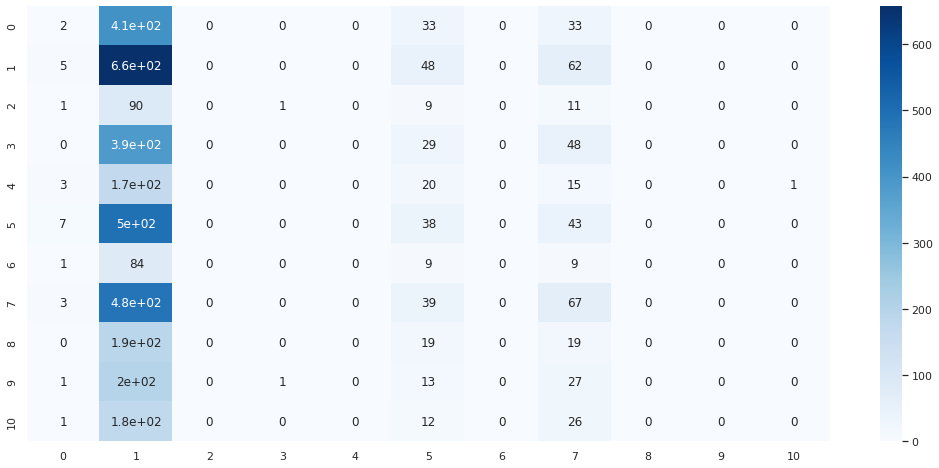

In [91]:
pred = clf.predict(X_test)
fig = plt.figure(figsize=(18,8))
mat = (confusion_matrix(y_test,pred))
sns.heatmap(mat,annot = True,cmap='Blues', annot_kws = {"fontsize":12} )